In [1]:
import numpy as np
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib.ticker import AutoMinorLocator
import uncertainties
from uncertainties import ufloat
from uncertainties.umath import *
from uncertainties import unumpy as unp

import colors

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [2]:
blue = ["#4194d8"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

In [3]:
def read_prob_data(Pq_filename, Pq2_filename):
    # 1. File Imports
    Pq_file = h5py.File(Pq_filename)
    Pq2_file = h5py.File(Pq2_filename)

    # 2. Data Extraction
    Pmn = np.log10(abs(Pq_file['Pmn_avg'][:]['re_']))
    Pmn2 = np.log10(abs(Pq2_file['Pmn2_avg'][:]['re_']))

    # |U| = 1
    Pn_Um1 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][0, :]['re_'], Pq_file['Pn_err'][0, :]['re_'])]
    Pn_Um1_avg = [yi.n for yi in Pn_Um1]
    Pn_Um1_err = [yi.s for yi in Pn_Um1]

    Pn2_Um1 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][0, :]['re_'], Pq2_file['Pn2_err'][0, :]['re_'])]
    Pn2_Um1_avg = [yi.n for yi in Pn2_Um1]
    Pn2_Um1_err = [yi.s for yi in Pn2_Um1]

    Pm_Um1 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][0, :]['re_'], Pq_file['Pm_err'][0, :]['re_'])]
    Pm_Um1_avg = [yi.n for yi in Pm_Um1]
    Pm_Um1_err = [yi.s for yi in Pm_Um1]

    Pm2_Um1 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][0, :]['re_'], Pq2_file['Pm2_err'][0, :]['re_'])]
    Pm2_Um1_avg = [yi.n for yi in Pm2_Um1]
    Pm2_Um1_err = [yi.s for yi in Pm2_Um1]

    # |U| = 4
    Pn_Um4 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][3, :]['re_'], Pq_file['Pn_err'][3, :]['re_'])]
    Pn_Um4_avg = [yi.n for yi in Pn_Um4]
    Pn_Um4_err = [yi.s for yi in Pn_Um4]

    Pm_Um4 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][3, :]['re_'], Pq_file['Pm_err'][3, :]['re_'])]
    Pm_Um4_avg = [yi.n for yi in Pm_Um4]
    Pm_Um4_err = [yi.s for yi in Pm_Um4]

    Pm2_Um4 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][3, :]['re_'], Pq2_file['Pm2_err'][3, :]['re_'])]
    Pm2_Um4_avg = [yi.n for yi in Pm2_Um4]
    Pm2_Um4_err = [yi.s for yi in Pm2_Um4]

    Pn2_Um4 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][3, :]['re_'], Pq2_file['Pn2_err'][3, :]['re_'])]
    Pn2_Um4_avg = [yi.n for yi in Pn2_Um4]
    Pn2_Um4_err = [yi.s for yi in Pn2_Um4]

    # |U| = 8
    Pn_Um8 = [ufloat(n, u) for n, u in zip(Pq_file['Pn_avg'][5, :]['re_'], Pq_file['Pn_err'][5, :]['re_'])]
    Pn_Um8_avg = [yi.n for yi in Pn_Um8]
    Pn_Um8_err = [yi.s for yi in Pn_Um8]

    Pn2_Um8 = [ufloat(n, u) for n, u in zip(Pq2_file['Pn2_avg'][5, :]['re_'], Pq2_file['Pn2_err'][5, :]['re_'])]
    Pn2_Um8_avg = [yi.n for yi in Pn2_Um8]
    Pn2_Um8_err = [yi.s for yi in Pn2_Um8]

    Pm_Um8 = [ufloat(n, u) for n, u in zip(Pq_file['Pm_avg'][5, :]['re_'], Pq_file['Pm_err'][5, :]['re_'])]
    Pm_Um8_avg = [yi.n for yi in Pm_Um8]
    Pm_Um8_err = [yi.s for yi in Pm_Um8]

    Pm2_Um8 = [ufloat(n, u) for n, u in zip(Pq2_file['Pm2_avg'][5, :]['re_'], Pq2_file['Pm2_err'][5, :]['re_'])]
    Pm2_Um8_avg = [yi.n for yi in Pm2_Um8]
    Pm2_Um8_err = [yi.s for yi in Pm2_Um8]

    return (Pmn, Pmn2), (Pn_Um1_avg,  Pn_Um1_err,  Pn_Um4_avg,  Pn_Um4_err,  Pn_Um8_avg,  Pn_Um8_err,
                         Pn2_Um1_avg, Pn2_Um1_err, Pn2_Um4_avg, Pn2_Um4_err, Pn2_Um8_avg, Pn2_Um8_err,
                         Pm_Um1_avg,  Pm_Um1_err,  Pm_Um4_avg,  Pm_Um4_err,  Pm_Um8_avg,  Pm_Um8_err,
                         Pm2_Um1_avg, Pm2_Um1_err, Pm2_Um4_avg, Pm2_Um4_err, Pm2_Um8_avg, Pm2_Um8_err)

In [4]:
def position_inset(base_ax, inset, x, y, width, height):
    def inset_locator(ax, renderer):
        bbox = base_ax.get_position()
        return [bbox.x0 + x*bbox.width, bbox.y0 + y*bbox.height, bbox.width * width, bbox.height * height]
    inset.set_axes_locator(inset_locator)

### Half Filling

In [5]:
# Set the minimum and maximum values for the colorbar based on all data
vmin = -5
vmax = 0

def plot_heatmap_half_filling(data, ax1, ax2, ax3, ax4, ax5, ax6, cax):
    
    Pmn, Pmn2 = data
    
    # Common plot parameters
    plot_parameters = {
        'cmap': 'inferno',
        'vmin': vmin, 'vmax': vmax, 'aspect': 'equal',
        'origin': 'lower'
    }

    # Plotting heatmaps with aspect ratio set to equal for square plots
    im = ax1.imshow(Pmn[0,::-1,::-1], **plot_parameters)
    ax2.imshow(Pmn2[0,::-1,::-1], **plot_parameters)
    ax3.imshow(Pmn[3 ,::-1,::-1],  **plot_parameters)
    ax4.imshow(Pmn2[3,::-1,::-1], **plot_parameters)
    ax5.imshow(Pmn[7 ,::-1,::-1],  **plot_parameters)
    ax6.imshow(Pmn2[7,::-1,::-1], **plot_parameters)

    # Removing ticks for inner subplots
    for ax in [ax1, ax3]:
        ax.xaxis.set_visible(False)

    for ax in [ax2, ax4]:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

    for ax in [ax6]:
        ax.yaxis.set_visible(False)

    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.set_xlim([0,16])
        ax.set_ylim([0,16])

    # Setting ticks and labels
    tick_parameter = {'axis':'both', 'which':'major', 'labelsize':14}
    ax1.tick_params(**tick_parameter)
    ax1.set_yticks([0,4,8,12,16])
    ax3.tick_params(**tick_parameter)
    ax3.set_yticks([4,8,12])
    ax5.tick_params(**tick_parameter)
    ax5.set_xticks([0,4,8,12,16])
    ax5.set_yticks([0,4,8,12,16])
    ax6.tick_params(**tick_parameter)
    ax6.set_xticks([4,8,12,16])

    ax1.set_ylabel(r'$N_{A\uparrow}$'  , fontsize=20)
    ax3.set_ylabel(r'$N_{A\uparrow}$'  , fontsize=20)
    ax5.set_ylabel(r'$N_{A\uparrow}$'  , fontsize=20)
    ax5.set_xlabel(r'$N_{A\downarrow}$', fontsize=20)
    ax6.set_xlabel(r'$N_{A\downarrow}$', fontsize=20)

    # Adding annotations
    annotate_parameters = {
        'xy':(9, 1), 'fontsize':16, 'color':'white', 'fontweight':'bold'
    }
    ax1.annotate(r'$|U|=1.0$', **annotate_parameters)
    ax2.annotate(r'$|U|=1.0$', **annotate_parameters)
    ax3.annotate(r'$|U|=4.0$', **annotate_parameters)
    ax4.annotate(r'$|U|=4.0$', **annotate_parameters)
    ax5.annotate(r'$|U|=8.0$', **annotate_parameters)
    ax6.annotate(r'$|U|=8.0$', **annotate_parameters)

    top_label_parameters = {
        'xy':(0.05, 1.05), 'xycoords':'axes fraction', 'fontsize':20, 'fontweight':'bold'
    }
    ax1.annotate(r'$\log_{10}P_{(N_{A\uparrow}, N_{A\downarrow}),1}$', **top_label_parameters)
    ax2.annotate(r'$\log_{10}P_{(N_{A\uparrow}, N_{A\downarrow}),2}$', **top_label_parameters)

    # Adding colorbar
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.set_label('', rotation=270, labelpad=20)
    cbar.ax.tick_params(labelsize=14)

    # Adjust position of colorbar
    cax_pos = cax.get_position()
    cax.set_position([cax_pos.x0 + 0.01, cax_pos.y0, cax_pos.width, cax_pos.height])

def plot_probdist_half_filling(data, axn_1, axn_4, axn_8, axm_1, axm_4, axm_8):

    (Pn_Um1_avg,  Pn_Um1_err,  Pn_Um4_avg,  Pn_Um4_err,  Pn_Um8_avg,  Pn_Um8_err,
     Pn2_Um1_avg, Pn2_Um1_err, Pn2_Um4_avg, Pn2_Um4_err, Pn2_Um8_avg, Pn2_Um8_err,
     Pm_Um1_avg,  Pm_Um1_err,  Pm_Um4_avg,  Pm_Um4_err,  Pm_Um8_avg,  Pm_Um8_err,
     Pm2_Um1_avg, Pm2_Um1_err, Pm2_Um4_avg, Pm2_Um4_err, Pm2_Um8_avg, Pm2_Um8_err) = data
    
    # Adding charge resolution
    Pn1_plot_parameters ={
        'label':r'$P_{n,1}$',
        'fmt':'-o', 'color':blue[0], 'markerfacecolor':blue[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':6, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }
    Pn2_plot_parameters ={
        'label':r'$P_{n,2}$',
        'fmt':'-o', 'color':red[0], 'markerfacecolor':red[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':6, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }

    axn_1.errorbar(
        range(33), Pn_Um1_avg[::-1] , yerr=Pn_Um1_err[::-1],
        **Pn1_plot_parameters
    )
    axn_1.errorbar(
        range(33), Pn2_Um1_avg[::-1] , yerr=Pn2_Um1_err[::-1], 
        **Pn2_plot_parameters
    )

    axn_4.errorbar(
        range(33), Pn_Um4_avg[::-1] , yerr=Pn_Um4_err[::-1], 
        **Pn1_plot_parameters
    )
    axn_4.errorbar(
        range(33), Pn2_Um4_avg[::-1] , yerr=Pn2_Um4_err[::-1], 
        **Pn2_plot_parameters
    )

    axn_8.errorbar(
        range(33), Pn_Um8_avg[::-1] , yerr=Pn_Um8_err[::-1], 
        **Pn1_plot_parameters
    )
    axn_8.errorbar(
        range(33), Pn2_Um8_avg[::-1] , yerr=Pn2_Um8_err[::-1], 
        **Pn2_plot_parameters
    )

    # Adding charge resolution (inset)
    Pn1_inset_parameters ={
        'fmt':'-o', 'color':blue[0], 'markerfacecolor':blue[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':8, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }
    Pn2_inset_parameters ={
        'fmt':'-o', 'color':red[0], 'markerfacecolor':red[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':8, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }

    def create_zoomedin_inset(ax):
        axins = zoomed_inset_axes(ax, zoom=1, loc='upper right')
        position_inset(ax, axins, 0.8, 0.3, 0.45, 0.45)
        mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle='--')
        axins.set_xticks([])
        axins.set_yticks([])

        return axins

    axins1 = create_zoomedin_inset(axn_1)
    axins1.errorbar(range(33), Pn_Um1_avg[::-1] , yerr=Pn_Um1_err[::-1], **Pn1_inset_parameters)
    axins1.errorbar(range(33), Pn2_Um1_avg[::-1] , yerr=Pn2_Um1_err[::-1], **Pn2_inset_parameters)
    axins1.set_xlim(12.5, 19)
    axins1.set_ylim(0.0, 0.5)

    axins2 = create_zoomedin_inset(axn_4)
    axins2.errorbar(range(33), Pn_Um4_avg[::-1] , yerr=Pn_Um4_err[::-1], **Pn1_inset_parameters)
    axins2.errorbar(range(33), Pn2_Um4_avg[::-1] , yerr=Pn2_Um4_err[::-1], **Pn2_inset_parameters)
    axins2.set_xlim(12.5, 19)
    axins2.set_ylim(0.0, 0.8)

    axins3 = create_zoomedin_inset(axn_8)
    axins3.errorbar(range(33), Pn_Um8_avg[::-1] , yerr=Pn_Um8_err[::-1], **Pn1_inset_parameters)
    axins3.errorbar(range(33), Pn2_Um8_avg[::-1] , yerr=Pn2_Um8_err[::-1], **Pn2_inset_parameters)
    axins3.set_xlim(12.5, 19)
    axins3.set_ylim(0.0, 0.85)

    # Adding spin resolution
    Pm1_plot_parameters ={
        'label':r'$P_{m,1}$',
        'fmt':'-d', 'color':blue[0], 'markerfacecolor':blue[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':6, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }
    Pm2_plot_parameters ={
        'label':r'$P_{m,2}$',
        'fmt':'-d', 'color':red[0], 'markerfacecolor':red[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':6, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }

    axm_1.errorbar(
        range(-16,17), Pm_Um1_avg , yerr=Pm_Um1_err, 
        **Pm1_plot_parameters
    )
    axm_1.errorbar(
        range(-16,17), Pm2_Um1_avg , yerr=Pm2_Um1_err, 
        **Pm2_plot_parameters
    )

    axm_4.errorbar(
        range(-16,17), Pm_Um4_avg , yerr=Pm_Um4_err, 
        **Pm1_plot_parameters
    )
    axm_4.errorbar(
        range(-16,17), Pm2_Um4_avg , yerr=Pm2_Um4_err, 
        **Pm2_plot_parameters
    )

    axm_8.errorbar(
        range(-16,17), Pm_Um8_avg , yerr=Pm_Um8_err, 
        **Pm1_plot_parameters
    )
    axm_8.errorbar(
        range(-16,17), Pm2_Um8_avg , yerr=Pm2_Um8_err, 
        **Pm2_plot_parameters
    )

    # Adding legend
    legend_parameters = {'frameon':False, 'ncol':1, 'labelspacing':0.4, 'fontsize':16}
    axn_1.legend(**legend_parameters, loc='upper left')
    axm_1.legend(**legend_parameters, loc='upper right')

    # Setting lims
    axn_1.set_ylim([0,1])
    axm_1.set_ylim([0,1])
    axn_4.set_ylim([0,1])
    axm_4.set_ylim([0,1])
    axn_8.set_ylim([0,1])
    axm_8.set_ylim([0,1])

    # Setting ticks and labels
    tick_parameter = {'axis':'both', 'which':'major', 'labelsize':14}

    axn_1.set_xticks([])
    axn_1.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    axm_1.set_xticks([])
    axm_1.set_yticks([])
    axn_4.set_xticks([])
    axn_4.set_yticks([0.25, 0.5, 0.75])
    axm_4.set_xticks([])
    axm_4.set_yticks([])
    axn_8.set_xticks([0, 8, 16, 24, 32])
    axn_8.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    axm_8.set_xticks([-16, -8, 0, 8, 16])
    axm_8.set_yticks([])

    axn_1.tick_params(**tick_parameter)
    axn_4.tick_params(**tick_parameter)
    axn_8.tick_params(**tick_parameter)
    axm_8.tick_params(**tick_parameter)
    
    axn_1.set_ylabel(r'$P$'  , fontsize=20)
    axn_4.set_ylabel(r'$P$'  , fontsize=20)
    axn_8.set_xlabel(r'$n_A$', fontsize=20)
    axn_8.set_ylabel(r'$P$'  , fontsize=20)
    axm_8.set_xlabel(r'$m_A$', fontsize=20)

    # Adding annotations
    axn_1.annotate(r'$|U|=1.0$', (-0.75, 0.15), fontsize=15)
    axn_4.annotate(r'$|U|=4.0$', (-0.75, 0.15), fontsize=15)
    axn_8.annotate(r'$|U|=8.0$', (-0.75, 0.15), fontsize=15)

    axm_1.annotate(r'$|U|=1.0$', (4, 0.15), fontsize=15)
    axm_4.annotate(r'$|U|=4.0$', (4, 0.15), fontsize=15)
    axm_8.annotate(r'$|U|=8.0$', (4, 0.15), fontsize=15)

In [6]:
# Set the minimum and maximum values for the colorbar based on all data
vmin = -5
vmax = 0

def plot_heatmap_quarter_filling(data, ax1, ax2, ax3, ax4, ax5, ax6, cax):
    
    Pmn, Pmn2 = data
    
    # Common plot parameters
    plot_parameters = {
        'cmap': 'inferno',
        'vmin': vmin, 'vmax': vmax, 'aspect': 'equal',
        'origin': 'lower'
    }

    # Plotting heatmaps with aspect ratio set to equal for square plots
    im = ax1.imshow(Pmn[0,::-1,::-1], **plot_parameters)
    ax2.imshow(Pmn2[0,::-1,::-1], **plot_parameters)
    ax3.imshow(Pmn[3 ,::-1,::-1],  **plot_parameters)
    ax4.imshow(Pmn2[3,::-1,::-1], **plot_parameters)
    ax5.imshow(Pmn[7 ,::-1,::-1],  **plot_parameters)
    ax6.imshow(Pmn2[7,::-1,::-1], **plot_parameters)

    # Removing ticks for inner subplots
    for ax in [ax1, ax3]:
        ax.xaxis.set_visible(False)

    for ax in [ax2, ax4]:
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

    for ax in [ax6]:
        ax.yaxis.set_visible(False)

    for ax in [ax1, ax2, ax3, ax4, ax5, ax6]:
        ax.set_xlim([0,16])
        ax.set_ylim([0,16])

    # Setting ticks and labels
    tick_parameter = {'axis':'both', 'which':'major', 'labelsize':14}
    ax1.tick_params(**tick_parameter)
    ax1.set_yticks([0,4,8,12,16])
    ax3.tick_params(**tick_parameter)
    ax3.set_yticks([4,8,12])
    ax5.tick_params(**tick_parameter)
    ax5.set_xticks([0,4,8,12,16])
    ax5.set_yticks([0,4,8,12,16])
    ax6.tick_params(**tick_parameter)
    ax6.set_xticks([4,8,12,16])

    ax1.set_ylabel(r'$N_{A\uparrow}$'  , fontsize=20)
    ax3.set_ylabel(r'$N_{A\uparrow}$'  , fontsize=20)
    ax5.set_ylabel(r'$N_{A\uparrow}$'  , fontsize=20)
    ax5.set_xlabel(r'$N_{A\downarrow}$', fontsize=20)
    ax6.set_xlabel(r'$N_{A\downarrow}$', fontsize=20)

    # Adding annotations
    annotate_parameters = {
        'xy':(9, 1), 'fontsize':16, 'color':'white', 'fontweight':'bold'
    }
    ax1.annotate(r'$|U|=1.0$', **annotate_parameters)
    ax2.annotate(r'$|U|=1.0$', **annotate_parameters)
    ax3.annotate(r'$|U|=4.0$', **annotate_parameters)
    ax4.annotate(r'$|U|=4.0$', **annotate_parameters)
    ax5.annotate(r'$|U|=8.0$', **annotate_parameters)
    ax6.annotate(r'$|U|=8.0$', **annotate_parameters)

    top_label_parameters = {
        'xy':(0.05, 1.05), 'xycoords':'axes fraction', 'fontsize':20, 'fontweight':'bold'
    }
    ax1.annotate(r'$\log_{10}P_{(N_{A\uparrow}, N_{A\downarrow}),1}$', **top_label_parameters)
    ax2.annotate(r'$\log_{10}P_{(N_{A\uparrow}, N_{A\downarrow}),2}$', **top_label_parameters)

    # Adding colorbar
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.set_label('', rotation=270, labelpad=20)
    cbar.ax.tick_params(labelsize=14)
    
    # Adjust position of colorbar
    cax_pos = cax.get_position()
    cax.set_position([cax_pos.x0 + 0.01, cax_pos.y0, cax_pos.width, cax_pos.height])

def plot_probdist_quarter_filling(data, axn_1, axn_4, axn_8, axm_1, axm_4, axm_8):

    (Pn_Um1_avg,  Pn_Um1_err,  Pn_Um4_avg,  Pn_Um4_err,  Pn_Um8_avg,  Pn_Um8_err,
     Pn2_Um1_avg, Pn2_Um1_err, Pn2_Um4_avg, Pn2_Um4_err, Pn2_Um8_avg, Pn2_Um8_err,
     Pm_Um1_avg,  Pm_Um1_err,  Pm_Um4_avg,  Pm_Um4_err,  Pm_Um8_avg,  Pm_Um8_err,
     Pm2_Um1_avg, Pm2_Um1_err, Pm2_Um4_avg, Pm2_Um4_err, Pm2_Um8_avg, Pm2_Um8_err) = data
    
    # Adding charge resolution
    Pn1_plot_parameters ={
        'label':r'$P_{n,1}$',
        'fmt':'-o', 'color':blue[0], 'markerfacecolor':blue[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':6, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }
    Pn2_plot_parameters ={
        'label':r'$P_{n,2}$',
        'fmt':'-o', 'color':red[0], 'markerfacecolor':red[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':6, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }

    axn_1.errorbar(
        range(33), Pn_Um1_avg[::-1] , yerr=Pn_Um1_err[::-1],
        **Pn1_plot_parameters
    )
    axn_1.errorbar(
        range(33), Pn2_Um1_avg[::-1] , yerr=Pn2_Um1_err[::-1], 
        **Pn2_plot_parameters
    )

    axn_4.errorbar(
        range(33), Pn_Um4_avg[::-1] , yerr=Pn_Um4_err[::-1], 
        **Pn1_plot_parameters
    )
    axn_4.errorbar(
        range(33), Pn2_Um4_avg[::-1] , yerr=Pn2_Um4_err[::-1], 
        **Pn2_plot_parameters
    )

    axn_8.errorbar(
        range(33), Pn_Um8_avg[::-1] , yerr=Pn_Um8_err[::-1], 
        **Pn1_plot_parameters
    )
    axn_8.errorbar(
        range(33), Pn2_Um8_avg[::-1] , yerr=Pn2_Um8_err[::-1], 
        **Pn2_plot_parameters
    )

    # Adding charge resolution (inset)
    Pn1_inset_parameters ={
        'fmt':'-o', 'color':blue[0], 'markerfacecolor':blue[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':8, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }
    Pn2_inset_parameters ={
        'fmt':'-o', 'color':red[0], 'markerfacecolor':red[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':8, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }

    def create_zoomedin_inset(ax):
        axins = zoomed_inset_axes(ax, zoom=1, loc='upper right')
        position_inset(ax, axins, 0.8, 0.3, 0.45, 0.45)
        mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5", linestyle='--')
        axins.set_xticks([])
        axins.set_yticks([])

        return axins

    axins1 = create_zoomedin_inset(axn_1)
    axins1.errorbar(range(33), Pn_Um1_avg[::-1] , yerr=Pn_Um1_err[::-1], **Pn1_inset_parameters)
    axins1.errorbar(range(33), Pn2_Um1_avg[::-1] , yerr=Pn2_Um1_err[::-1], **Pn2_inset_parameters)
    axins1.set_xlim(4.5, 11)
    axins1.set_ylim(0.0, 0.5)

    axins2 = create_zoomedin_inset(axn_4)
    axins2.errorbar(range(33), Pn_Um4_avg[::-1] , yerr=Pn_Um4_err[::-1], **Pn1_inset_parameters)
    axins2.errorbar(range(33), Pn2_Um4_avg[::-1] , yerr=Pn2_Um4_err[::-1], **Pn2_inset_parameters)
    axins2.set_xlim(4.5, 11)
    axins2.set_ylim(0.0, 0.6)

    axins3 = create_zoomedin_inset(axn_8)
    axins3.errorbar(range(33), Pn_Um8_avg[::-1] , yerr=Pn_Um8_err[::-1], **Pn1_inset_parameters)
    axins3.errorbar(range(33), Pn2_Um8_avg[::-1] , yerr=Pn2_Um8_err[::-1], **Pn2_inset_parameters)
    axins3.set_xlim(4.5, 11)
    axins3.set_ylim(0.0, 0.7)

    # Adding spin resolution
    Pm1_plot_parameters ={
        'label':r'$P_{m,1}$',
        'fmt':'-d', 'color':blue[0], 'markerfacecolor':blue[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':6, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }
    Pm2_plot_parameters ={
        'label':r'$P_{m,2}$',
        'fmt':'-d', 'color':red[0], 'markerfacecolor':red[4],
        'linewidth':0.8, 'elinewidth':0.8, 'markersize':6, 
        'capsize':3, 'capthick':1, 'markeredgewidth':0.5
    }

    axm_1.errorbar(
        range(-16,17), Pm_Um1_avg , yerr=Pm_Um1_err, 
        **Pm1_plot_parameters
    )
    axm_1.errorbar(
        range(-16,17), Pm2_Um1_avg , yerr=Pm2_Um1_err, 
        **Pm2_plot_parameters
    )

    axm_4.errorbar(
        range(-16,17), Pm_Um4_avg , yerr=Pm_Um4_err, 
        **Pm1_plot_parameters
    )
    axm_4.errorbar(
        range(-16,17), Pm2_Um4_avg , yerr=Pm2_Um4_err, 
        **Pm2_plot_parameters
    )

    axm_8.errorbar(
        range(-16,17), Pm_Um8_avg , yerr=Pm_Um8_err, 
        **Pm1_plot_parameters
    )
    axm_8.errorbar(
        range(-16,17), Pm2_Um8_avg , yerr=Pm2_Um8_err, 
        **Pm2_plot_parameters
    )

    # Adding legend
    legend_parameters = {'frameon':False, 'labelspacing':0.4, 'fontsize':16}
    axn_1.legend(**legend_parameters, loc='upper left')
    axm_1.legend(**legend_parameters, loc='upper right')

    # Setting lims
    axn_1.set_ylim([0,1])
    axm_1.set_ylim([0,1])
    axn_4.set_ylim([0,1])
    axm_4.set_ylim([0,1])
    axn_8.set_ylim([0,1])
    axm_8.set_ylim([0,1])

    # Setting ticks and labels
    tick_parameter = {'axis':'both', 'which':'major', 'labelsize':14}

    axn_1.set_xticks([])
    axn_1.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    axm_1.set_xticks([])
    axm_1.set_yticks([])
    axn_4.set_xticks([])
    axn_4.set_yticks([0.25, 0.5, 0.75])
    axm_4.set_xticks([])
    axm_4.set_yticks([])
    axn_8.set_xticks([0, 8, 16, 24, 32])
    axn_8.set_yticks([0.0, 0.25, 0.5, 0.75, 1.0])
    axm_8.set_xticks([-16, -8, 0, 8, 16])
    axm_8.set_yticks([])

    axn_1.tick_params(**tick_parameter)
    axn_4.tick_params(**tick_parameter)
    axn_8.tick_params(**tick_parameter)
    axm_8.tick_params(**tick_parameter)
    
    axn_1.set_ylabel(r'$P$'  , fontsize=20)
    axn_4.set_ylabel(r'$P$'  , fontsize=20)
    axn_8.set_xlabel(r'$n_A$', fontsize=20)
    axn_8.set_ylabel(r'$P$'  , fontsize=20)
    axm_8.set_xlabel(r'$m_A$', fontsize=20)

    # Adding annotations
    axn_1.annotate(r'$|U|=1.0$', (12.5, 0.35), fontsize=15)
    axn_4.annotate(r'$|U|=4.0$', (12.5, 0.35), fontsize=15)
    axn_8.annotate(r'$|U|=8.0$', (12.5, 0.35), fontsize=15)

    axm_1.annotate(r'$|U|=1.0$', (4, 0.15), fontsize=15)
    axm_4.annotate(r'$|U|=4.0$', (4, 0.15), fontsize=15)
    axm_8.annotate(r'$|U|=8.0$', (4, 0.15), fontsize=15)

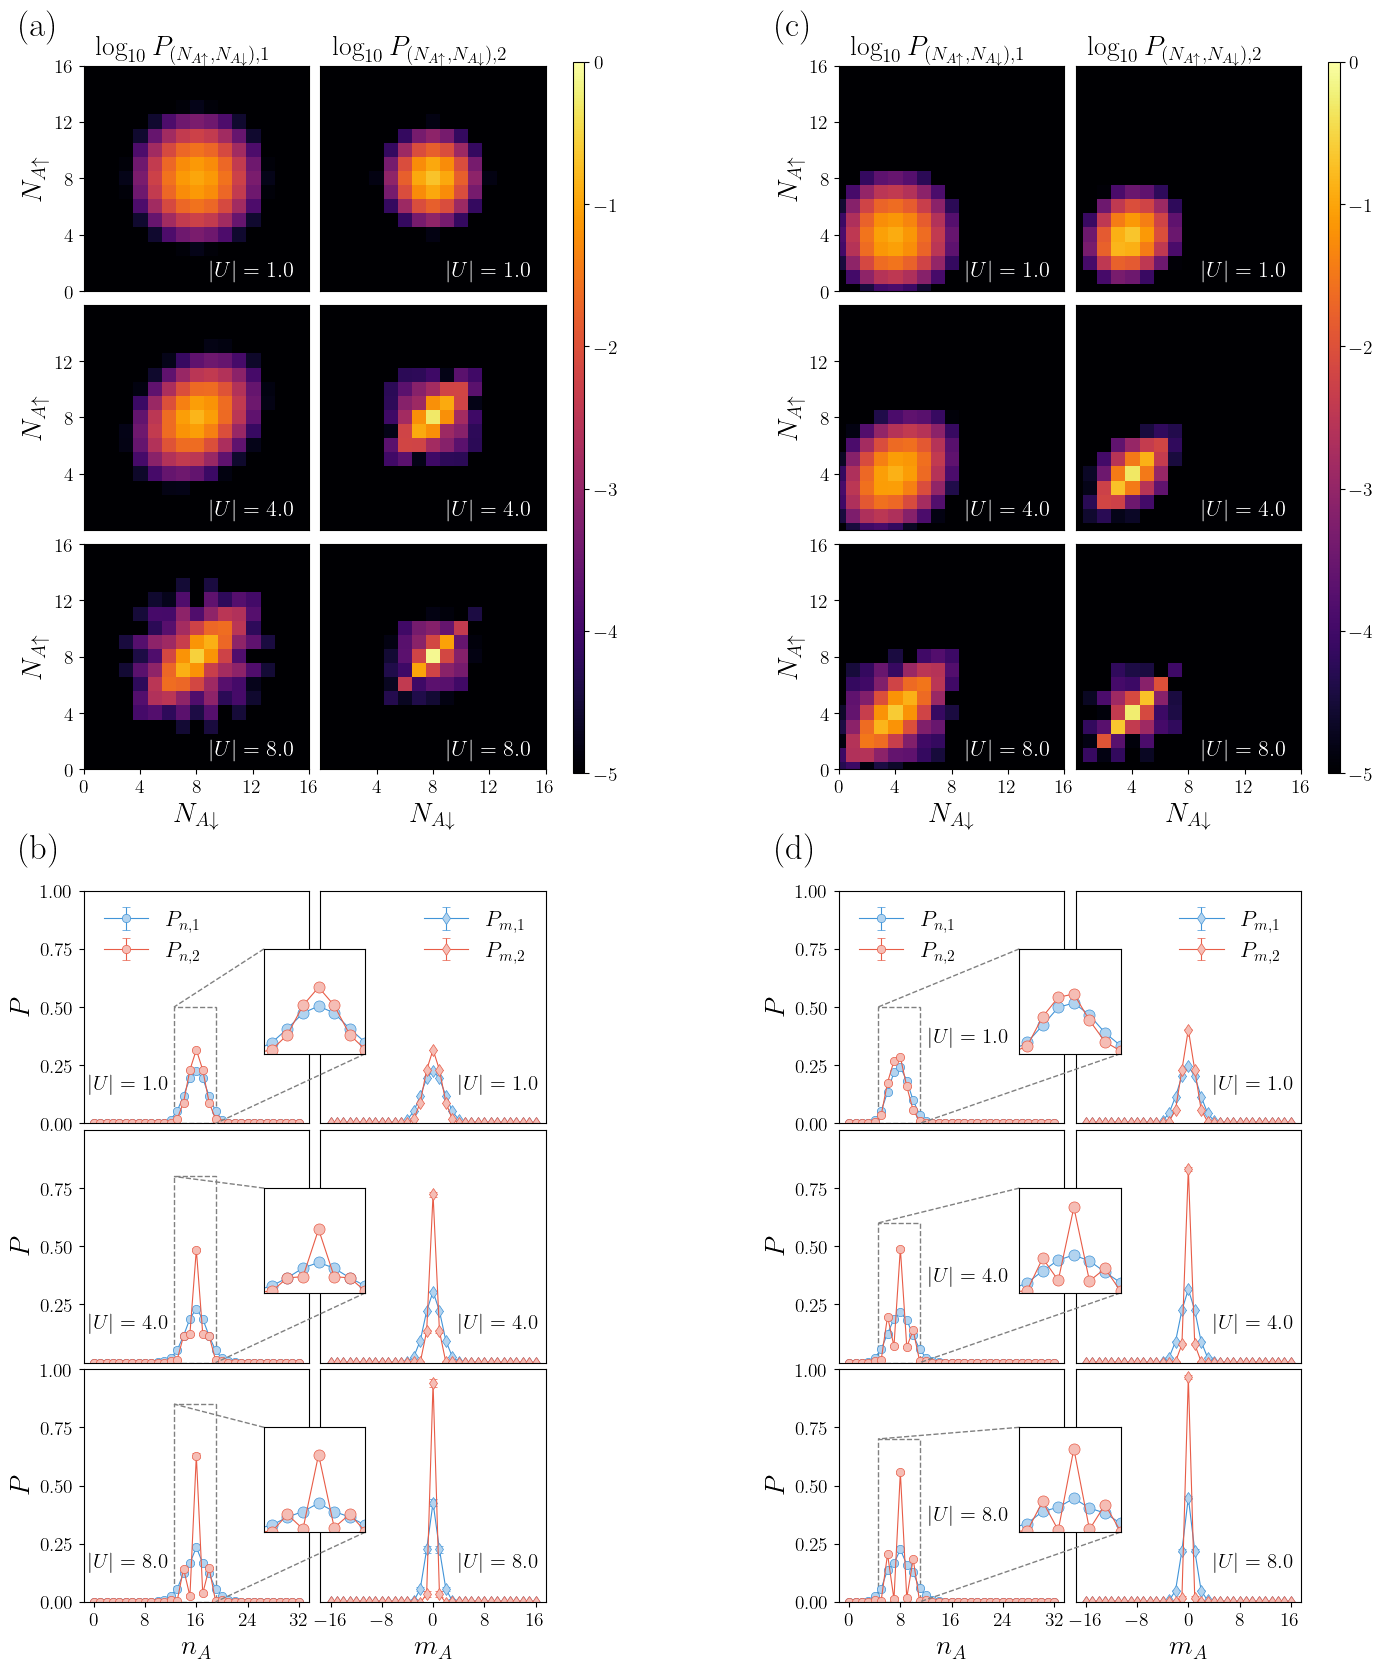

In [7]:
fig = plt.figure(figsize=(16, 20))

# Using GridSpec for layout
#gs = gridspec.GridSpec(3, 15, width_ratios=[1, 1, 0.08, 0.7, 1, 0.05, 1, 0.4, 1, 1, 0.08, 0.7, 1, 0.05, 1], height_ratios=[1,1,1], wspace=0.00, hspace=0.03)
gs = gridspec.GridSpec(7, 11, width_ratios=[1,0.05,1,0.05,0.05,1.2,1,0.05,1,0.05,0.05], height_ratios=[1,1,1,0.45,1,1,1], wspace=0.00, hspace=0.03)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 2])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 2])
cax = fig.add_subplot(gs[0:3, 4])

axn_1 = fig.add_subplot(gs[4, 0])
axm_1 = fig.add_subplot(gs[4, 2])
axn_4 = fig.add_subplot(gs[5, 0])
axm_4 = fig.add_subplot(gs[5, 2])
axn_8 = fig.add_subplot(gs[6, 0])
axm_8 = fig.add_subplot(gs[6, 2])

data1, data2 = read_prob_data("../data/processed_data/GS_Pn_N64_Lx8_Ly8_LA16_beta18.0_L180.jld", "../data/processed_data/GS_Pn2_N64_Lx8_Ly8_LA16_beta18.0_L180.jld")
plot_heatmap_half_filling(data1, ax1, ax2, ax3, ax4, ax5, ax6, cax)
plot_probdist_half_filling(data2, axn_1, axn_4, axn_8, axm_1, axm_4, axm_8)

ax1_2 = fig.add_subplot(gs[0, 6])
ax2_2 = fig.add_subplot(gs[0, 8])
ax3_2 = fig.add_subplot(gs[1, 6])
ax4_2 = fig.add_subplot(gs[1, 8])
ax5_2 = fig.add_subplot(gs[2, 6])
ax6_2 = fig.add_subplot(gs[2, 8])
cax_2 = fig.add_subplot(gs[0:3, 10])

axn_1_2 = fig.add_subplot(gs[4, 6])
axm_1_2 = fig.add_subplot(gs[4, 8])
axn_4_2 = fig.add_subplot(gs[5, 6])
axm_4_2 = fig.add_subplot(gs[5, 8])
axn_8_2 = fig.add_subplot(gs[6, 6])
axm_8_2 = fig.add_subplot(gs[6, 8])

data1, data2 = read_prob_data("../data/processed_data/GS_Pn_N32_Lx8_Ly8_LA16_beta18.0_L180.jld", "../data/processed_data/GS_Pn2_N32_Lx8_Ly8_LA16_beta18.0_L180.jld")
plot_heatmap_quarter_filling(data1, ax1_2, ax2_2, ax3_2, ax4_2, ax5_2, ax6_2, cax_2)
plot_probdist_quarter_filling(data2, axn_1_2, axn_4_2, axn_8_2, axm_1_2, axm_4_2, axm_8_2)

# Adding labels
label_parameters = {'fontsize':25, 'verticalalignment':'top'}
ax1.text(-0.28, 1.25, '(a)', **label_parameters, transform=ax1.transAxes)
axn_1.text(-0.28, 1.25, '(b)', **label_parameters, transform=axn_1.transAxes)
ax1_2.text(-0.28, 1.25, '(c)', **label_parameters, transform=ax1_2.transAxes)
axn_1_2.text(-0.28, 1.25, '(d)', **label_parameters, transform=axn_1_2.transAxes)

#plt.tight_layout()
plt.show()

In [8]:
fig.savefig("../figures/Pq_merged_Lx8Ly8.pdf", bbox_inches='tight', pad_inches=0)
fig.savefig("../figures/Pq_merged_Lx8Ly8.svg", bbox_inches='tight', pad_inches=0)